# MACHINE LEARNING NÃO SUPERVISIONADO - CLUSTERING

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para agrupar clientes do shopping.

os dados foram extraidos do Kaggle: 
https://www.kaggle.com/shwetabh123/mall-customers

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np

In [2]:
# Importando a biblioteca "warnings" para ignorar mensagens de erro
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importando o arquivo CSV e criando um dataframe
df = pd.read_csv("/content/drive/MyDrive/MACHINE_LEARNNING/Mall_Customers.csv", sep=",", encoding="iso-8859-1")

In [4]:
# Visualizando as 5 primeiras linhas do dataframe
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# ATRIBUTOS:
* CustomerID: Identificação do cliente
* Genre: Gênero
* Age: Idade
* Annual Income (k$): Rendimento anual
* Spending Score (1-100): Pontuação de gastos

# Visualização gráfica dos dados

## Idade

In [5]:
# Importando o Plotly para criar representações gráficas dos atributos
import plotly.express as px

In [6]:
# Criando um histograma com o atributo Age ( Idade )
hist = px.histogram( df, x = "Age", nbins = 60)
hist.update_layout (width = 600, height = 400, title_text = "Distribuição de Idades")
hist.show()

O gráfico mostra uma distribuição diversificada entre as idades, sendo a 
menor idade 18 anos com 4 contagens e a idade máxima 70 anos com 2 contagens.

## Gênero

In [7]:
# Agora veremos as distribuições de gênero
hist = px.histogram( df, x = "Genre", nbins = 60)
hist.update_layout (width = 600, height = 400, title_text = "Distribuição de gênero")
hist.show()
df["Genre"].value_counts() # contagem por tipo

Female    112
Male       88
Name: Genre, dtype: int64

In [8]:
# Visualizando a quantidade de linhas e colunas
df.shape

(200, 5)

# Exploração e tratamento dos dados

## Alterando o nome das colunas

In [9]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# Alterando o nome da coluna Genre para Gênero
df.rename(columns={"Genre":"genero"},inplace=True)

In [11]:
# Alterando o nome da coluna Age para Idade
df.rename(columns={"Age":"idade"},inplace=True)

In [12]:
# Alterando o nome da coluna Annual Income (k$) para Rendimento 
df.rename(columns={"Annual Income (k$)":"rendimento"},inplace=True)

In [13]:
# Alterando o nome da coluna Spending Score (1-100) para Pontuação
df.rename(columns={"Spending Score (1-100)":"pontuacao"},inplace=True)

In [14]:
df.head()

,CustomerID,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
# Obs.: não alterei a coluna CustomerID porque ela será irrelevante e será excluída

## Valores Missing ( NAN )

In [16]:
df.isnull().sum()

CustomerID    0
genero        0
idade         0
rendimento    0
pontuacao     0
dtype: int64

Verificamos que não existem valores nulos.

## Análise dos tipos de atributos:
* object = string
* int64 = números inteiros
* float64 = números reais
* complex = números complexos


Obs.: Lembrando que não é possivel desenvolver modelos de machine learning usando atributos do tipo OBJECT

In [17]:
df.dtypes

CustomerID     int64
genero        object
idade          int64
rendimento     int64
pontuacao      int64
dtype: object

## Dados estatísticos

In [18]:
df.describe()

,CustomerID,idade,rendimento,pontuacao
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Podemos verificar que:
* A amostra possui 200 elementos
* A média de idade dos frequentadores do shopping fica em 38, e a mediana 36
* A idade mínima é 18 e a máxima é 70
* O rendimento máximo encontrado foi de $137000
* A pontuação média fica em 50.2

## Análise de Outliers ( Dados discrepantes )

Para essa análise utilizamos o gráfico boxplot

In [19]:
# Importando o Plotly para criar representações gráficas dos atributos
import plotly.express as px

In [20]:
boxplot = px.box( df, y = "rendimento")
boxplot.show()

Obs.: Rendimentos possui um valor fora do padrão de 137 mil, acima do valor máximo de 129 mil. Por não ser um valor tão distante podemos manter no modelo.

In [21]:
boxplot = px.box( df, y = "idade")
boxplot.show()

In [22]:
boxplot = px.box( df, y = "pontuacao")
boxplot.show()

Nenhum dado discrepante encontrado nos outros atributos.

# Pré-processamento

O pré-processamento é uma etapa fundamental que pode melhorar a performance dos algoritmos de análise, através da redução de dimensionalidade e eliminação de ruidos que interfiram no funcionamento dos algoritmos. 

In [23]:
df.head()

,CustomerID,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Excluindo o atributo CustomerID

O atributo CustomerID não possui relevância para o modelo pois ele apenas emumera os elementos. Deste modo ele deve ser excluído.

In [24]:
# Criando um novo dataframe para receber os dados, excluindo o atributo CustomerID.

In [25]:
df2 = df.drop(labels="CustomerID",axis=1) # lembrando que axis significa eixo e 1 equivale a coluna.
df2.head()

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Transformando dados categóricos em dados numéricos

In [26]:
df2["genero"].replace({"Female":0,"Male":1},inplace=True) # Inplace = True altera os dados de forma permanente no dataframe atual
df2.head()

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Escalonamento

O objetivo do escalonamento é mudar os valores das colunas numéricas no conjunto de dados para usar uma escala comum, sem distorcer as diferenças nos intervalos de valores nem perder informações. O escalonamento ( normalização ) também é necessário para alguns algoritmos para modelar os dados corretamente.
O escalonamento considera média próxima de zero e desvio padrão próximo de 1.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2) # Criando um novo dataframe com os dados escalonados

In [ ]:
df2_esc

# K-means com dois atributos

Inicialmente usaremos apenas dois atributos para o modelo, que neste caso será os atributos rendimento e pontuacao

In [30]:
# Criando um novo dataframe para receber apenas os atributos rendimento e pontuacao usando os indices
dados = df2.iloc[:,[2,3]].values
dados

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Método Elbow - identifica o número de clusters adequado para o modelo

In [32]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 5, max_iter=300)
    kmeans.fit(dados)
    # inertia - Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'WCSS')

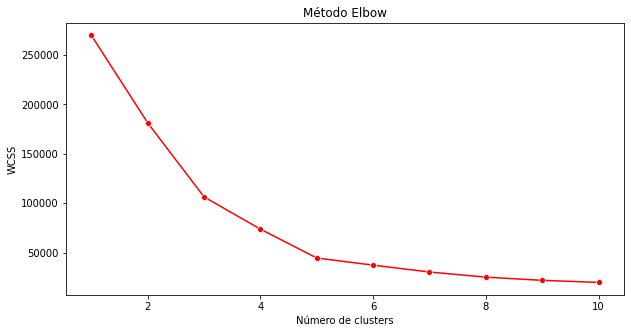

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), wcss, marker="o", color="red")
plt.title("Método Elbow")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")

In [ ]:
# Através do gráfico é possivel identificar o ponto de inflexão, que neste caso seria o 4
# O ponto de inflexão representa a quantidade ideal de clusters

## Agrupamento

In [36]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 5, max_iter = 300)

In [37]:
kmeans1 = kmeans.fit(dados)

In [38]:
# Coordenadas dos centróides
centroides = kmeans1.cluster_centers_
centroides

array([[48.26      , 56.48      ],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [87.        , 18.63157895]])

In [39]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [40]:
# Usando como exemplo o grupo da 3º linha
dados[3,:]

array([16, 77])

In [41]:
# Visualizando a classificação do 3º elemento 
classificacao[3]

0

Visualizando graficamente com PLOTLY os agrupamentos por grupo

In [42]:
import plotly.express as px
import plotly.graph_objects as go

In [45]:
graf1 = px.scatter( x = dados[:,0], y = dados[:,1], color = classificacao)
graf2 = px.scatter( x = centroides[:,0], y = centroides[:,1], size = [15,15,15,15])
graf3 = go.Figure( data = graf1.data + graf2.data)
graf3.update_layout( width=800, height = 500, title_text="Agrupamento K-means")
graf3.update_xaxes(title="Rendimento anual (K$)")
graf3.update_yaxes(title="Pontuação")
graf3.show()

Visualizando o agrupamento por uma lista

In [46]:
agrupamento = pd.DataFrame(classificacao, columns = ["Grupo"])
agrupamento

,Grupo
0,2
1,0
2,2
3,0
4,2
...,...
195,1
196,3
197,1
198,3


In [47]:
# Juntando o atributo Grupo ao dataframe original. Será criado um novo dataframe para manter a integridade dos dados
df3 = pd.concat([df,agrupamento],axis=1)
df3

,CustomerID,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


Visualizando os dados

In [48]:
# Buscando os dados da linha 150
df3.loc[150,:]

CustomerID     151
genero        Male
idade           43
rendimento      78
pontuacao       17
Grupo            3
Name: 150, dtype: object

In [49]:
# Buscando os dados usando o CustomerID
df3.loc[df3.CustomerID == 92]

,CustomerID,genero,idade,rendimento,pontuacao,Grupo
91,92,Male,18,59,41,0


In [50]:
# Criando um dataframe apenas com o grupo 0
grupo0 = df3.loc[df3.Grupo==0]
grupo0 

,CustomerID,genero,idade,rendimento,pontuacao,Grupo
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0
...,...,...,...,...,...,...
118,119,Female,51,67,43,0
119,120,Female,50,67,57,0
120,121,Male,27,67,56,0
121,122,Female,38,67,40,0


In [51]:
# Visualizando a quantidade de linhas e colunas
grupo0.shape

(100, 6)

In [52]:
# Criando um dataframe apenas com o grupo 1
grupo1 = df3.loc[df3.Grupo==1]
grupo1 

,CustomerID,genero,idade,rendimento,pontuacao,Grupo
123,124,Male,39,69,91,1
125,126,Female,31,70,77,1
127,128,Male,40,71,95,1
129,130,Male,38,71,75,1
131,132,Male,39,71,75,1
133,134,Female,31,72,71,1
135,136,Female,29,73,88,1
137,138,Male,32,73,73,1
139,140,Female,35,74,72,1
141,142,Male,32,75,93,1


In [53]:
grupo1.shape

(39, 6)